<font color="#CC3D3D"><p>
# Ensemble Learning

### Data Preparation

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pylab as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [2]:
# Read Data
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
cancer.data.shape, cancer.feature_names

((569, 30),
 array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
        'mean smoothness', 'mean compactness', 'mean concavity',
        'mean concave points', 'mean symmetry', 'mean fractal dimension',
        'radius error', 'texture error', 'perimeter error', 'area error',
        'smoothness error', 'compactness error', 'concavity error',
        'concave points error', 'symmetry error',
        'fractal dimension error', 'worst radius', 'worst texture',
        'worst perimeter', 'worst area', 'worst smoothness',
        'worst compactness', 'worst concavity', 'worst concave points',
        'worst symmetry', 'worst fractal dimension'], dtype='<U23'))

***유방암 진단 데이터***      
- 타겟 데이터: 종양이 악성(malignant, 0) or 양성(benign, 1)
- 속성 데이터: 유방암 진단 사진으로부터 측정한 종양(tumar)의 특징값(30 개)

In [3]:
# Split Data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, random_state=0)

## Correlation between models

In [4]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
# Decision Tree모델을 앙상블 -> RandomForest
# 잔차: 실제값과 예측값의 차이, 잔차를 줄여가면서 모델을 활용: GradientBoosing
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score

In [5]:
clfs = [] # 학습이 이루어지지 않은 모델을 리스트에 저장
LR=LogisticRegression(random_state=0); clfs.append(LR)
DT=DecisionTreeClassifier(random_state=0); clfs.append(DT)
MLP=MLPClassifier(random_state=0); clfs.append(MLP)
KNN=KNeighborsClassifier(); clfs.append(KNN)
RF=RandomForestClassifier(random_state=0); clfs.append(RF)
GBM=GradientBoostingClassifier(random_state=0); clfs.append(GBM)

In [6]:
clfs

[LogisticRegression(random_state=0),
 DecisionTreeClassifier(random_state=0),
 MLPClassifier(random_state=0),
 KNeighborsClassifier(),
 RandomForestClassifier(random_state=0),
 GradientBoostingClassifier(random_state=0)]

In [7]:
pred_results = []
for clf in clfs :
    pred = clf.fit(X_train, y_train).predict(X_test)
    name = type(clf).__name__  # 사이킷런 모델의 이름(.__name__)
    pred_results.append(pd.Series(pred, name=name)) # Series는 하나의 열
    print("{:30s} {}".format(name, accuracy_score(y_test, pred)))
print(pred_results)
ensemble_results = pd.concat(pred_results, axis=1); print(ensemble_results)

LogisticRegression             0.9440559440559441
DecisionTreeClassifier         0.8811188811188811
MLPClassifier                  0.9300699300699301
KNeighborsClassifier           0.9370629370629371
RandomForestClassifier         0.972027972027972
GradientBoostingClassifier     0.965034965034965
[0      0
1      1
2      1
3      1
4      1
      ..
138    0
139    1
140    1
141    1
142    0
Name: LogisticRegression, Length: 143, dtype: int32, 0      0
1      1
2      1
3      1
4      1
      ..
138    0
139    1
140    1
141    1
142    0
Name: DecisionTreeClassifier, Length: 143, dtype: int32, 0      0
1      1
2      1
3      0
4      1
      ..
138    0
139    1
140    1
141    1
142    0
Name: MLPClassifier, Length: 143, dtype: int32, 0      0
1      1
2      1
3      0
4      1
      ..
138    0
139    1
140    1
141    1
142    0
Name: KNeighborsClassifier, Length: 143, dtype: int32, 0      0
1      1
2      1
3      1
4      1
      ..
138    0
139    1
140    1
141    1
14

LogisticRegression             0.9440559440559441
DecisionTreeClassifier         0.8811188811188811
MLPClassifier                  0.9300699300699301
KNeighborsClassifier           0.9370629370629371
RandomForestClassifier         0.972027972027972
GradientBoostingClassifier     0.965034965034965


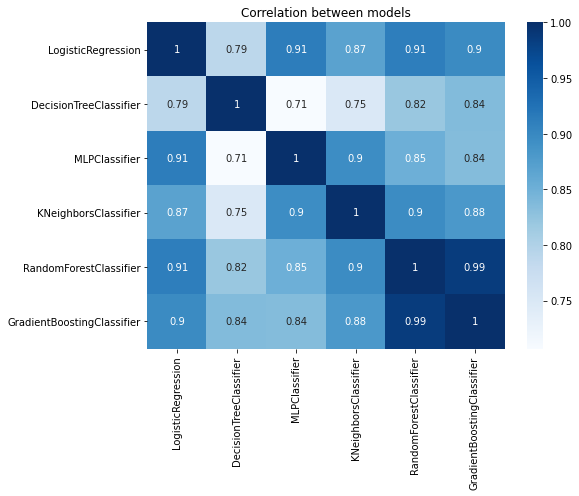

In [8]:
pred_results = []
for clf in clfs :
    pred = clf.fit(X_train, y_train).predict(X_test)
    name = type(clf).__name__  # 사이킷런 모델의 이름(.__name__)
    pred_results.append(pd.Series(pred, name=name)) # Series는 하나의 열
    print("{:30s} {}".format(name, accuracy_score(y_test, pred)))

ensemble_results = pd.concat(pred_results, axis=1) # 열 기준으로 concat -> dataframe
plt.figure(figsize = (8,6))
g = sns.heatmap(ensemble_results.corr(),annot=True, cmap='Blues')
g.set_title("Correlation between models")
plt.show()

- RandomForest 선택, 가장 유사하지 않은 DecisionTree은 correlation은 떨어지지만 성능이 떨어짐, MLP와 비교했을 때 선택하기 어려움

In [9]:
ensemble_results # 개별 모델이 예측한 값 -> 이를 각각의 feature로 모델을 예측하면 Stacking

,LogisticRegression,DecisionTreeClassifier,MLPClassifier,KNeighborsClassifier,RandomForestClassifier,GradientBoostingClassifier
0,0,0,0,0,0,0
1,1,1,1,1,1,1
2,1,1,1,1,1,1
3,1,1,0,0,1,1
4,1,1,1,1,1,1
...,...,...,...,...,...,...
138,0,0,0,0,0,0
139,1,1,1,1,1,1
140,1,1,1,1,1,1
141,1,1,1,1,1,1


## Voting ensemble   
*평가지표가 accuracy, recall, precision 등일 경우 사용*

- VotingClassifier(estimators = [('name',모델),('이름',모델)]) 이름과 모델 짝을 이루어

In [10]:
from sklearn.ensemble import VotingClassifier

# 위에서 평가한 모든 모델을 앙상블할 경우
voting = VotingClassifier(
    estimators = [(type(clf).__name__, clf) for clf in clfs], voting='hard') # 6개를 voting한 앙상블 저장
voting.fit(X_train, y_train).score(X_test, y_test)

0.958041958041958

In [11]:
# 가장 성능이 높은 GBM과 낮은 상관관계가 있는 모델끼리만 앙상블할 경우
voting = VotingClassifier(
    estimators = [('gbm', GBM), ('mlp', MLP), ('dt', DT)], voting='hard') # predict한 결과 :hard, 확률:soft
voting.fit(X_train, y_train).score(X_test, y_test)

0.958041958041958

In [12]:
# GBM과 성능이 비슷한 LR과 낮은 상관관계가 있는 모델끼리만 앙상블할 경우
from sklearn.ensemble import VotingClassifier

voting = VotingClassifier(
    estimators = [('lr', LR), ('dt', DT), ('knn', KNN)], voting='hard')
voting.fit(X_train, y_train).score(X_test, y_test)

0.951048951048951

***Plotting Decision Regions***

In [13]:
#!pip install mlxtend

import matplotlib.gridspec as gridspec
import itertools
from mlxtend.plotting import plot_decision_regions

X, y = X_train, y_train
X = X[:,[0, 10]]

gs = gridspec.GridSpec(2, 2)
fig = plt.figure(figsize=(10, 8))

labels = ['Logistic Regression',
          'Decision Tree',
          'k-NN',
          'Voting Ensemble']

for clf, lab, grd in zip([LR, DT, KNN, voting],
                         labels,
                         itertools.product([0, 1], repeat=2)):
    clf.fit(X, y)
    ax = plt.subplot(gs[grd[0], grd[1]])
    fig = plot_decision_regions(X=X, y=y, clf=clf, legend=2)
    plt.title(lab)

plt.show()

## Averaging predictions   
*평가지표가 roc-auc, logloss 등일 경우 사용*

***Arithmetic mean***

In [13]:
averaging = VotingClassifier(
    estimators = [('lr', LR), ('dt', DT), ('knn', KNN)], voting='soft') # soft 예측값의 평균을 가지고 예측
averaging.fit(X_train, y_train)

print('AUC =', roc_auc_score(y_test, averaging.predict_proba(X_test)[:,1])) # 확률값으로 계산하는 auc이므로 soft를 이용

AUC = 0.9876310272536688


<img align='left' src="https://t1.daumcdn.net/cfile/tistory/2454233C57FA242D11">

***Geometric mean***

In [14]:
from scipy.stats.mstats import gmean

pred_logreg = LR.fit(X_train, y_train).predict_proba(X_test)[:,1]
pred_tree = DT.fit(X_train, y_train).predict_proba(X_test)[:,1]
pred_knn = KNN.fit(X_train, y_train).predict_proba(X_test)[:,1]

print('AUC = ', roc_auc_score(y_test, gmean([pred_logreg, pred_tree, pred_knn], axis=0))) # 각각의 예측값이 리스트로 들어가야한다.

AUC =  0.9157232704402516


## Stacking 
<br>
<img align='left' src="https://rasbt.github.io/mlxtend/user_guide/classifier/StackingClassifier_files/stackingclassification_overview.png" width=500 height=400>

Install **vecstack** package using the following command:
```
!pip install vecstack
```
https://github.com/vecxoz/vecstack#variant-a-animation    


In [15]:
#!pip install vecstack

Note: you may need to restart the kernel to use updated packages.


    
    
***2-layer stacking***

- stacking을 이용하려면 모델을 리스트에 넣어놓아야한다.
- regression: 분류는 False 회귀는 True
- needs_proba: 1st model의 예측을 predict로 할 것인지 확률값으로 할 것인지 -> False는 예측값만 가지고 한다.
- stratified: (보통 True로 설정)
- shuffle: 랜덤으로 셔플 (보통 True로 설정)
- verbose: 돌면서 메세지를 출력할 것인지
- S_train: 5개를 다 쌓는다.
- S_test: 5개의 평균
- S_train, y_train, S_test만 남는다.
- feature가 6개인 데이터를 가지고 새로운 학습 -> 블랜딩 모델 (GBM을 사용) 모델하나만 사용
- 테스트데이터로 예측한 것과 실제 테스트와 정확도측정
- meta_model이 최종 앙상블 결과
- Stacking은 대체적으로 regression이 분류보다 좋다 (분류는 생각보다 잘 나오지 않는다.)

In [16]:
from vecstack import stacking

models = clfs
S_train, S_test = stacking(models,                     # list of models
                           X_train, y_train, X_test,   # data
                           regression=False,           # classification task (if you need 
                                                       #     regression - set to True)
                           needs_proba=False,          # predict class labels (if you need 
                                                       #     probabilities - set to True)
                           metric=accuracy_score,      # metric: callable
                           n_folds=5,                  # number of folds
                           stratified=True,            # stratified split for folds
                           shuffle=True,               # shuffle the data
                           random_state=0,             # ensure reproducibility
                           verbose=2)                  # print all info
meta_model = GBM.fit(S_train, y_train)
accuracy_score(y_test, meta_model.predict(S_test))

task:         [classification]
n_classes:    [2]
metric:       [accuracy_score]
mode:         [oof_pred_bag]
n_models:     [6]

model  0:     [LogisticRegression]
    fold  0:  [0.91860465]
    fold  1:  [0.94117647]
    fold  2:  [0.97647059]
    fold  3:  [0.97647059]
    fold  4:  [0.95294118]
    ----
    MEAN:     [0.95313269] + [0.02202039]
    FULL:     [0.95305164]

model  1:     [DecisionTreeClassifier]
    fold  0:  [0.93023256]
    fold  1:  [0.90588235]
    fold  2:  [0.94117647]
    fold  3:  [0.91764706]
    fold  4:  [0.91764706]
    ----
    MEAN:     [0.92251710] + [0.01209835]
    FULL:     [0.92253521]

model  2:     [MLPClassifier]
    fold  0:  [0.93023256]
    fold  1:  [0.92941176]
    fold  2:  [0.92941176]
    fold  3:  [0.97647059]
    fold  4:  [0.90588235]
    ----
    MEAN:     [0.93428181] + [0.02302283]
    FULL:     [0.93427230]

model  3:     [KNeighborsClassifier]
    fold  0:  [0.89534884]
    fold  1:  [0.95294118]
    fold  2:  [0.94117647]
    fold

0.965034965034965

In [17]:
S_train

array([[1, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 1],
       [0, 0, 0, 0, 0, 0],
       ...,
       [1, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 1]])

In [18]:
S_test

array([[0, 0, 0, 0, 0, 0],
       [1, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 1],
       [1, 1, 1, 0, 1, 1],
       [1, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 1],
       [1, 0, 1, 1, 0, 1],
       [1, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 1],
       [0, 0, 0, 0, 0, 0],
       [1, 1, 1, 1, 0, 1],
       [0, 0, 0, 0, 0, 0],
       [1, 1, 1, 1, 1, 1],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [1, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 1],
       [0, 0, 0, 0, 0, 0],
       [1, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 1],
       [0, 0, 1, 1, 0, 0],
       [1, 1, 1, 1, 1, 1],
       [0, 0, 0, 0, 0, 0],
       [1, 1, 1, 1, 1, 1],
       [0, 0, 0, 0, 0, 0],
       [1, 1, 1, 1, 1, 1],
       [0, 0, 0, 0, 0, 0],
       [1, 1, 1, 1, 1, 1],
       [0, 0, 0, 0, 0, 0],
       [1, 1, 1, 1, 1, 1],
 

In [19]:
X_train.shape, S_train.shape, X_test.shape, S_test.shape

((426, 30), (426, 6), (143, 30), (143, 6))

- 샘플 갯수는 변함 없고 feature가 30개에서 6개를 준 것이다.

***3-layer stacking***

In [20]:
# level-1: LR, DT, MLP, KNN, RF, GBM

models = clfs
S_train, S_test = stacking(models,                     # list of models
                           X_train, y_train, X_test,   # data
                           regression=False,           # classification task (if you need 
                                                       #     regression - set to True)
                           needs_proba=True,           # predict class labels (if you need 
                                                       #     probabilities - set to True) 
                           metric=accuracy_score,      # metric: callable
                           n_folds=3,                  # number of folds
                           stratified=True,            # stratified split for folds
                           shuffle=True,               # shuffle the data
                           random_state=0,             # ensure reproducibility
                           verbose=0)                  # print all info

In [21]:
# level-2: LR, DT, KNN
# Level-3: Voting

voting = VotingClassifier(estimators = [('lr', LR), ('dt', DT), ('knn', KNN)], voting='hard')
voting.fit(S_train, y_train).score(S_test, y_test)

0.986013986013986

- 6개의 feature가 나온 것을 가지고 3개의 모델로 Voting -> 두번째 모델은 3개 모델링
- voting은 이것 중에 제일 major를 선택
- 3개 모델링을 가지고 voting을 한다. -> 3 layer

- vestack sklearn 모두 사용해도 되지만 구현이 달라 결과가 다르다.

***using `sklearn`***

- vestack은 원리를 알 수 있음 과정을 알 수 있음
- sklearn은 쉬우나, 과정을 알 수가 없음

In [22]:
from sklearn.ensemble import StackingClassifier

# 2-layer stacking

estimators = [(type(clf).__name__, clf) for clf in clfs] # voting 할 때 이름 모델을 쌍으로 입력
stk_clf = StackingClassifier(
    estimators=estimators, final_estimator=GBM, cv=5)

stk_clf.fit(X_train, y_train).score(X_test, y_test)

0.965034965034965

In [23]:
# 3-layer stacking (Level-3: Voting)

layer_one_estimators = [(type(clf).__name__, clf) for clf in clfs]
voting = VotingClassifier(estimators = [('lr', LR), ('dt', DT), ('knn', KNN)], voting='hard')
stk_clf = StackingClassifier(estimators=layer_one_estimators, final_estimator=voting, cv=5) # GBM 단일 모델 대신에 Voting을 사용, voting:여러모델중 선택하는 모델

stk_clf.fit(X_train, y_train).score(X_test, y_test)

0.972027972027972

In [24]:
# 3-layer stacking (Level-3: LR)

layer_one_estimators = [(type(clf).__name__, clf) for clf in clfs]
layer_two_estimators = [('lr', LR), ('dt', DT), ('knn', KNN)]

layer_two = StackingClassifier(estimators=layer_two_estimators, final_estimator=LR)
stk_clf = StackingClassifier(estimators=layer_one_estimators, final_estimator=layer_two, cv=5)

stk_clf.fit(X_train, y_train).score(X_test, y_test)

0.972027972027972

- sklearn의 stacking은 두 레벨만 표현이 가능하다.
- second을 stacking해서 2번째,3번째 층을 넣음

##### Improvements in stacked model performance can be accomplished by:
- Adding models to Level 0 and Level 1 using different algorithms
- Tuning Hyper-parameters
- Adding feature sets by feature engineering
- Adding levels in the model structure

### Model Stacking in Kaggle: 
- [1st Place Solution of "Home Depot Product Search Relevance"](https://github.com/ChenglongChen/Kaggle_HomeDepot)
<img src="https://github.com/ChenglongChen/Kaggle_HomeDepot/raw/master/Fig/FlowChart.jpg" width=800, height=600><p>
- [1st Place Solution of "Otto Group Product Classification Challenge"](https://www.kaggle.com/c/otto-group-product-classification-challenge/discussion/14335)
<br>
<img src="http://drive.google.com/uc?export=view&id=1SfVsQSX7Rjmu335zX1aFdolBKccv545w" width=600, height=400>
<br><br>
- [1st Place Solution of "Homesite Quote Conversion"](https://kweonwooj.tistory.com/2)
<br>
<img src="https://t1.daumcdn.net/cfile/tistory/2132EF50571DDC1F26" width=700, height=500>
<br><br>

- 1st layer에 의미가 있다면 모델이 아닌 feature를 이용해도 된다  -> 제약이 없음
- 3번째: 가중평균 (성능이 좋은 것은 가중치를 더 주고, 성능이 나쁜 것은 가중치를 줄이는 방식)

- 500개 중 125개의 모델만 선택 -> 1st layer의 데이터를 분리 -> 이질적인 데이터로 학습 후 stacking 한 뒤에 가중평균
- 실무에서는 stacking을 잘 사용하지 않지만 경진대회에서는 사용

<font color="#CC3D3D"><p>
# End